# Temporal evolution

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import jetset
print('tested on jetset',jetset.__version__)

tested on jetset 1.2.0rc8


This is a very preliminary documentation for the temporal evolution capabilities of jetset. Here we show how to create a decopuled radiative+acceleration region, and how to evolve the system in order to generate both particle spectra, SEDs, and lightcurves

definition of the injected particle distributio, and of the jet model for the radiative region

In [6]:
from jetset.jet_emitters_factory import InjEmittersFactory
from jetset.jet_model import Jet
jet_model=Jet()
q_inj=InjEmittersFactory().create_inj_emitters('pl',emitters_type='electrons',normalize=True)
q_inj.parameters.gmin.val=9
q_inj.parameters.gmax.val=10
q_inj.parameters.p.val=0.5

jet_model.parameters.beam_obj.val=30
jet_model.parameters.B.val=0.2
jet_model.parameters.z_cosm.val=0.03
jet_model.parameters.R.val=5E15



here we set some relevant parameters taht will be described in detail in the next version of the documentation 

In [18]:
flare_duration=1.0E5
duration=flare_duration*10
t_D0=1.5E5
t_A0=2.5E4
T_esc_rad=1E60
L_inj=5.0E39
E_acc_max=4E60
Delta_R_acc_ratio=0.1
B_ratio=1.0
T_SIZE=2E4
NUM_SET=500
Diff_Index=2.0
Acc_Index=1.0

here we setup the `JetTimeEvol` class, passing the radiative region jet model, and the injected particle class. The IC cooling is switched off to make the process faster. 

In [67]:
from jetset.jet_timedep import JetTimeEvol
temp_ev_acc=JetTimeEvol(jet_rad=jet_model,Q_inj=q_inj,inplace=True)
temp_ev_acc.rad_region.jet.nu_min=1E8
temp_ev_acc.acc_region.jet.nu_min=1E8
T_SIZE=np.int(T_SIZE)

if Delta_R_acc_ratio is not None:
    temp_ev_acc.parameters.Delta_R_acc.val=temp_ev_acc.parameters.R_rad_start.val*Delta_R_acc_ratio

T_esc_acc=t_A0/(temp_ev_acc.parameters.Delta_R_acc.val/3E10)*2



temp_ev_acc.parameters.duration.val=duration
temp_ev_acc.parameters.TStart_Acc.val=0
temp_ev_acc.parameters.TStop_Acc.val=flare_duration
temp_ev_acc.parameters.TStart_Inj.val=0
temp_ev_acc.parameters.TStop_Inj.val=flare_duration
temp_ev_acc.parameters.T_esc_acc.val=T_esc_acc
temp_ev_acc.parameters.T_esc_rad.val=T_esc_rad
temp_ev_acc.parameters.t_D0.val=t_D0
temp_ev_acc.parameters.t_A0.val=t_A0
temp_ev_acc.parameters.Esc_Index_acc.val=Diff_Index-2
temp_ev_acc.parameters.Esc_Index_rad.val=0
temp_ev_acc.parameters.Acc_Index.val=Acc_Index
temp_ev_acc.parameters.Diff_Index.val=Diff_Index
temp_ev_acc.parameters.t_size.val=T_SIZE
temp_ev_acc.parameters.num_samples.val=NUM_SET
temp_ev_acc.parameters.E_acc_max.val=E_acc_max
temp_ev_acc.parameters.L_inj.val=L_inj


temp_ev_acc.parameters.gmin_grid.val=1.0
temp_ev_acc.parameters.gmax_grid.val=1E8
temp_ev_acc.parameters.gamma_grid_size.val=1500

temp_ev_acc.parameters.B_acc.val=temp_ev_acc.rad_region.jet.parameters.B.val*B_ratio
temp_ev_acc.init_TempEv()
temp_ev_acc.show_model()


==> par: z_cosm from model: jet_leptonicacc_region linked to same parameter in model jet_leptonic
--------------------------------------------------------------------------------
JetTimeEvol model description
--------------------------------------------------------------------------------
 
physical setup: 

--------------------------------------------------------------------------------


name,par type,val,units,val*,units*,log
delta t,time,5.000000e+01,s,0.00029979245799999996,R/c,False
log. sampling,time,0.000000e+00,,None,,False
R/c,time,1.667820e+05,s,1.0,R/c,False
Diff coeff,,6.666667e-06,s-1,None,,False
Acc coeff,,4.000000e-05,s-1,None,,False
IC cooling,,off,,None,,False
Sync cooling,,on,,None,,False
Diff index,,2.000000e+00,,None,,False
Acc index,,1.000000e+00,s-1,None,,False
Tesc acc,time,5.003461e+04,s,3.0,R_acc/c,False



model parameters: 

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_time_ev,duration,time_grid,s,1.000000e+06,0.000000e+00,--,False,True
jet_time_ev,gmin_grid,gamma_grid,,1.000000e+00,0.000000e+00,--,False,True
jet_time_ev,gmax_grid,gamma_grid,,1.000000e+08,0.000000e+00,--,False,True
jet_time_ev,gamma_grid_size,gamma_grid,,1.500000e+03,0.000000e+00,--,False,True
jet_time_ev,TStart_Acc,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,TStop_Acc,time_grid,s,1.000000e+05,0.000000e+00,--,False,True
jet_time_ev,TStart_Inj,time_grid,s,0.000000e+00,0.000000e+00,--,False,True
jet_time_ev,TStop_Inj,time_grid,s,1.000000e+05,0.000000e+00,--,False,True
jet_time_ev,T_esc_acc,escape_time,(R_acc/c)*,3.000000e+00,--,--,False,True
jet_time_ev,T_esc_rad,escape_time,(R/c)*,1.000000e+60,--,--,False,True


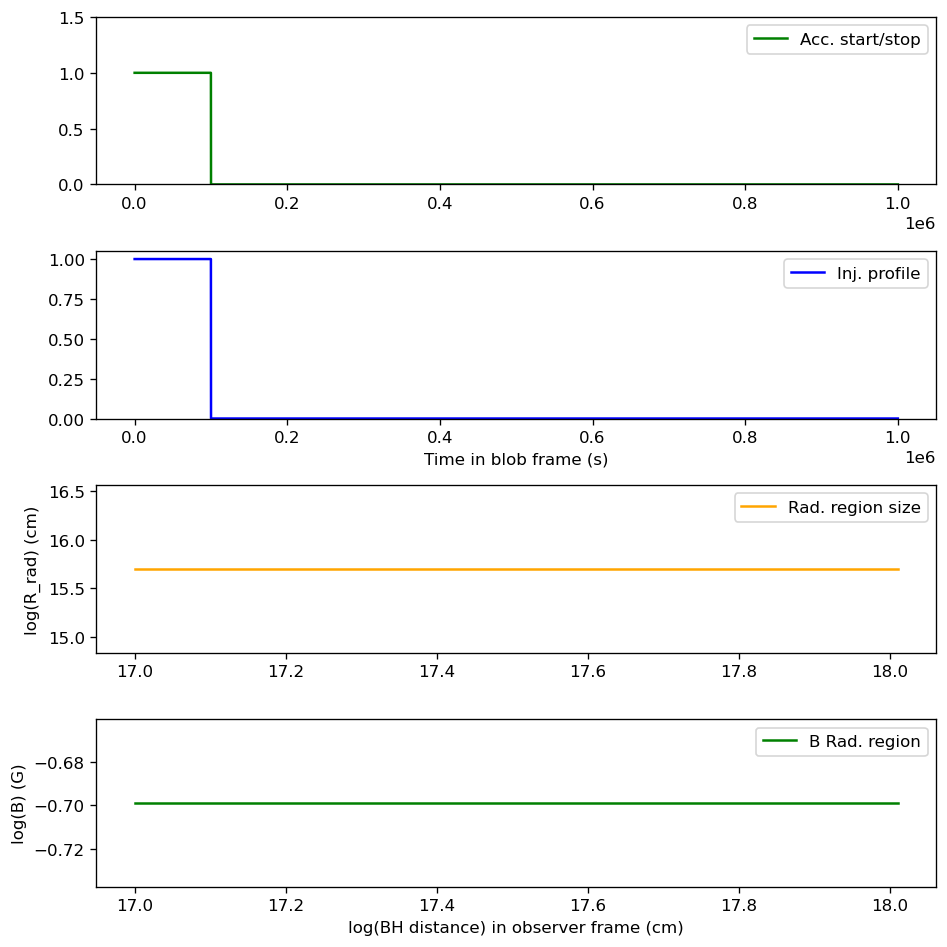

In [68]:
temp_ev_acc.plot_time_profile()

In [71]:
only_injection=True
do_injection=True
plot_fit_model=True
plot_fit_distr=True
plot_emitters=True
plot_lcs=True
delta_t_out=1000
eval_cross_time=False
rest_frame='obs'
temp_ev_acc.run(only_injection=only_injection,
                do_injection=do_injection,
                cache_SEDs_acc=True, 
                cache_SEDs_rad=True)

temporal evolution running


  0%|          | 0/20000 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/500 [00:00<?, ?it/s]

caching SED for each saved distribution: done
caching SED for each saved distribution: start


  0%|          | 0/500 [00:00<?, ?it/s]

caching SED for each saved distribution: done


Particle spectrum in the radiative region

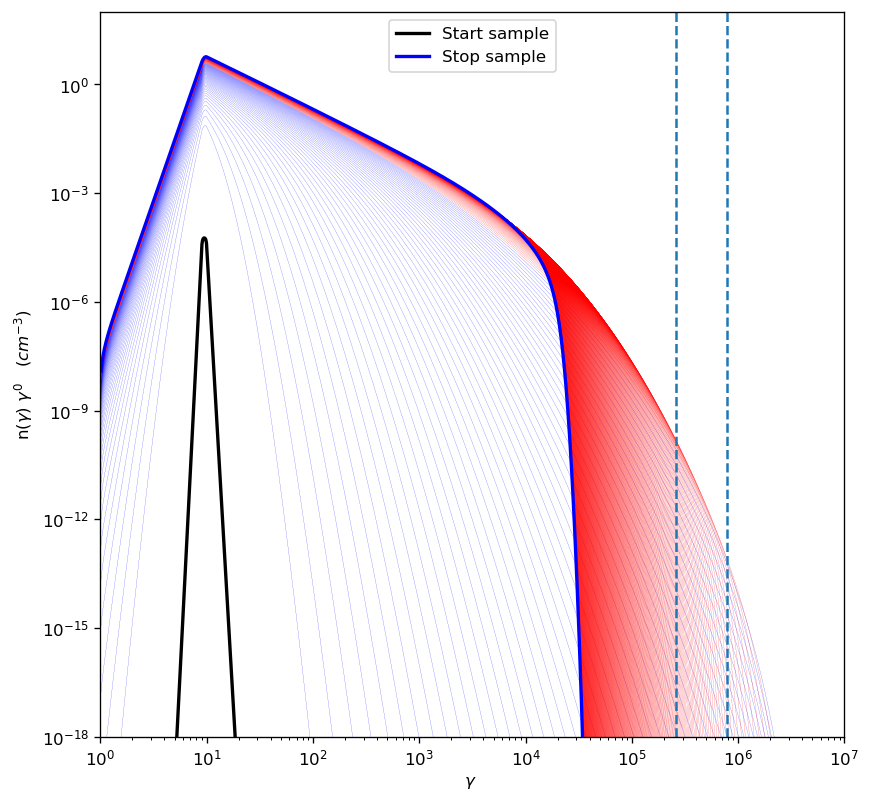

In [72]:
p=temp_ev_acc.plot_tempev_emitters(region='rad',loglog=False,energy_unit='gamma',pow=0)
p.ax.axvline(temp_ev_acc.temp_ev.gamma_eq_t_A, ls='--')
p.ax.axvline(temp_ev_acc.temp_ev.gamma_eq_t_DA, ls='--')
#x=jet_model.emitters_distribution.gamma_e
#y=jet_model.emitters_distribution.n_gamma_e*50
#p.ax.plot(x,y,c='g',label='best fit model')
p.rescale(x_max=1E7,x_min=1,y_min=1E-18,y_max=100)

Particle spectrum in the acceleration region

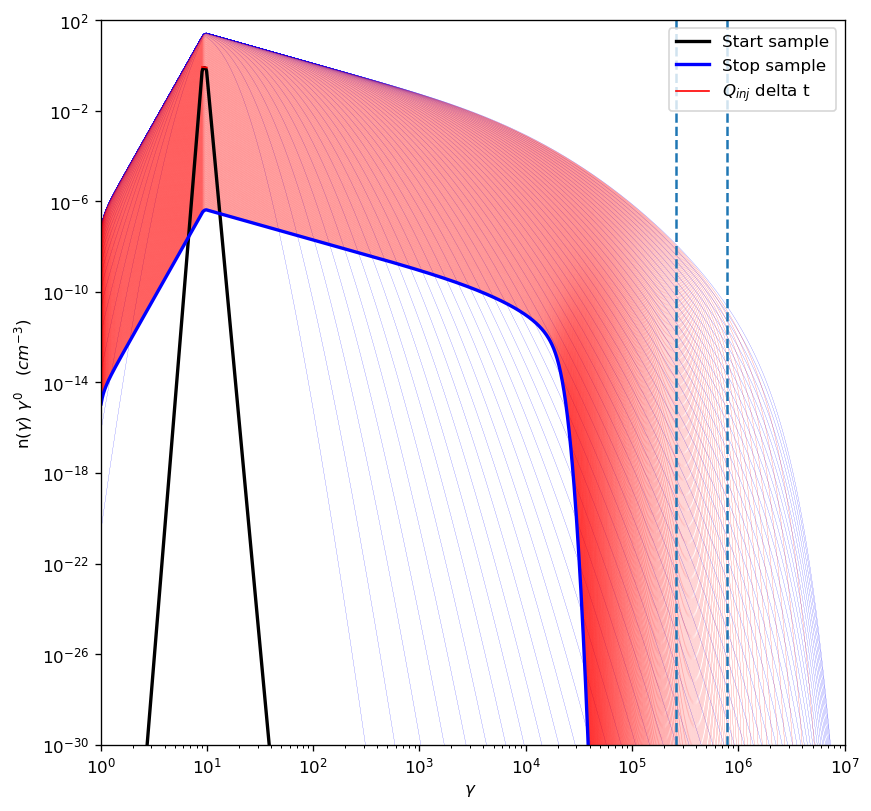

In [73]:
p=temp_ev_acc.plot_tempev_emitters(region='acc',loglog=False,energy_unit='gamma',pow=0)
p.ax.axvline(temp_ev_acc.temp_ev.gamma_eq_t_A, ls='--')
p.ax.axvline(temp_ev_acc.temp_ev.gamma_eq_t_DA, ls='--')
p.rescale(x_max=1E7,x_min=1,y_min=1E-30,y_max=100)


SEDs in the acceleration region

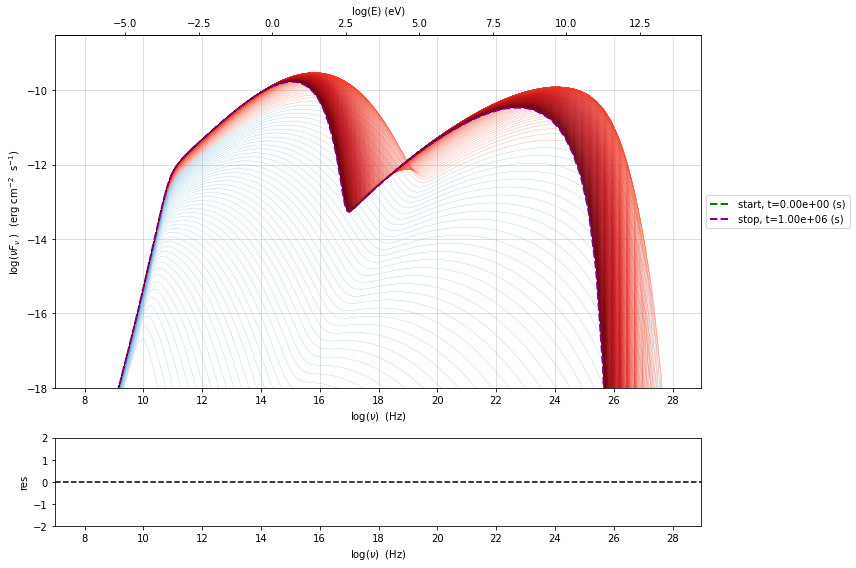

In [74]:
p=temp_ev_acc.plot_tempev_model(region='rad',sed_data=None, use_cached = True)
p.rescale(y_min=-18,x_min=7)

SEDs in the acceleration region

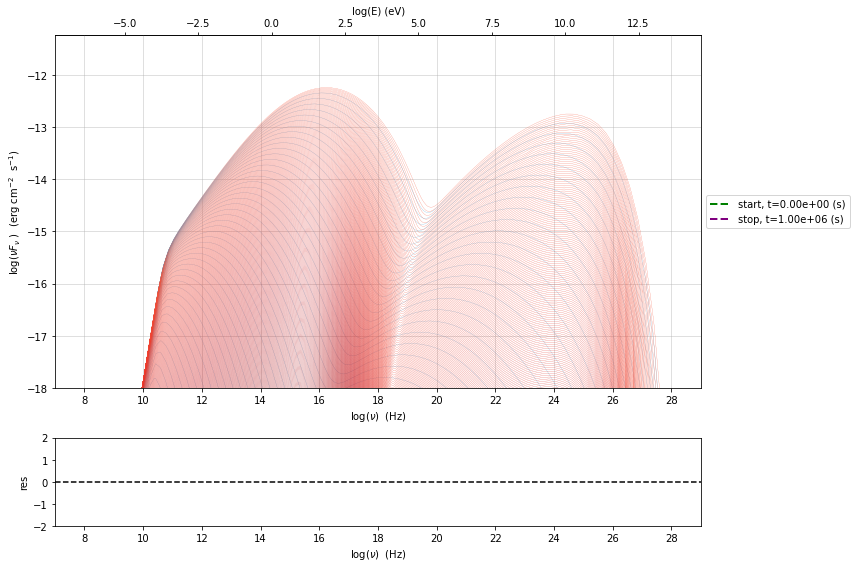

In [75]:
p=temp_ev_acc.plot_tempev_model(region='acc',sed_data=None, use_cached = True)
p.rescale(y_min=-18,x_min=7)

We generate a lightcurve in the range nu1=2.4E22 Hz, nu2=7.2E25 Hz, without the effect of the light crossing time, in the observer frame

In [76]:
lg=temp_ev_acc.rad_region.make_lc(nu1=2.4E22,nu2=7.2E25,name='gamma',eval_cross_time=False,delta_t_out=100,use_cached=True,frame='obs')


In [77]:
lg

time,flux
s,erg / (cm2 s)
float64,float64
0.0,0.0
100.0,0.0
200.0,0.0
300.0,4.4098133455386786e-86
400.0,1.8338347214189153e-75
500.0,4.619818537702253e-61
600.0,4.074119989099911e-55
700.0,4.480719706093064e-47


Text(0, 0.5, 'flux (erg cm-2 s-1)')

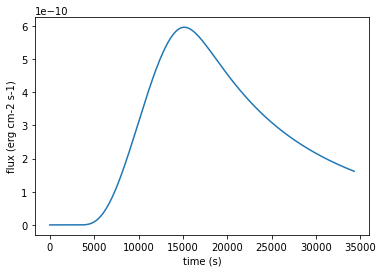

In [81]:
plt.plot(lg['time'],lg['flux'])
plt.xlabel('time (s)')
plt.ylabel('flux (erg cm-2 s-1)')

We generate a lightcurve in the range nu1=2.4E22 Hz, nu2=7.2E25 Hz, with the effect of the light crossing time, in the observer frame

In [82]:
lg=temp_ev_acc.rad_region.make_lc(nu1=2.4E22,nu2=7.2E25,name='gamma',eval_cross_time=True,delta_t_out=100,use_cached=True,frame='obs')


Text(0, 0.5, 'flux (erg cm-2 s-1)')

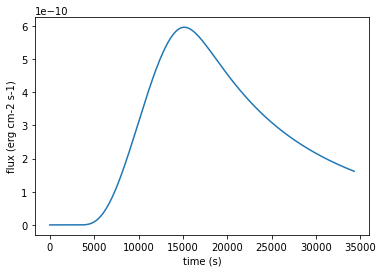

In [83]:
plt.plot(lg['time'],lg['flux'])
plt.xlabel('time (s)')
plt.ylabel('flux (erg cm-2 s-1)')